In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
total_data = pd.read_csv('covid19.csv')

# extracting data from Ontario
ontario_data = total_data.loc[total_data['pruid'] == 35]

# extracting confirmed cases and dates
ontario_confirmed_cases = ontario_data.transpose().iloc[7]
dates = ontario_data.transpose().iloc[3]

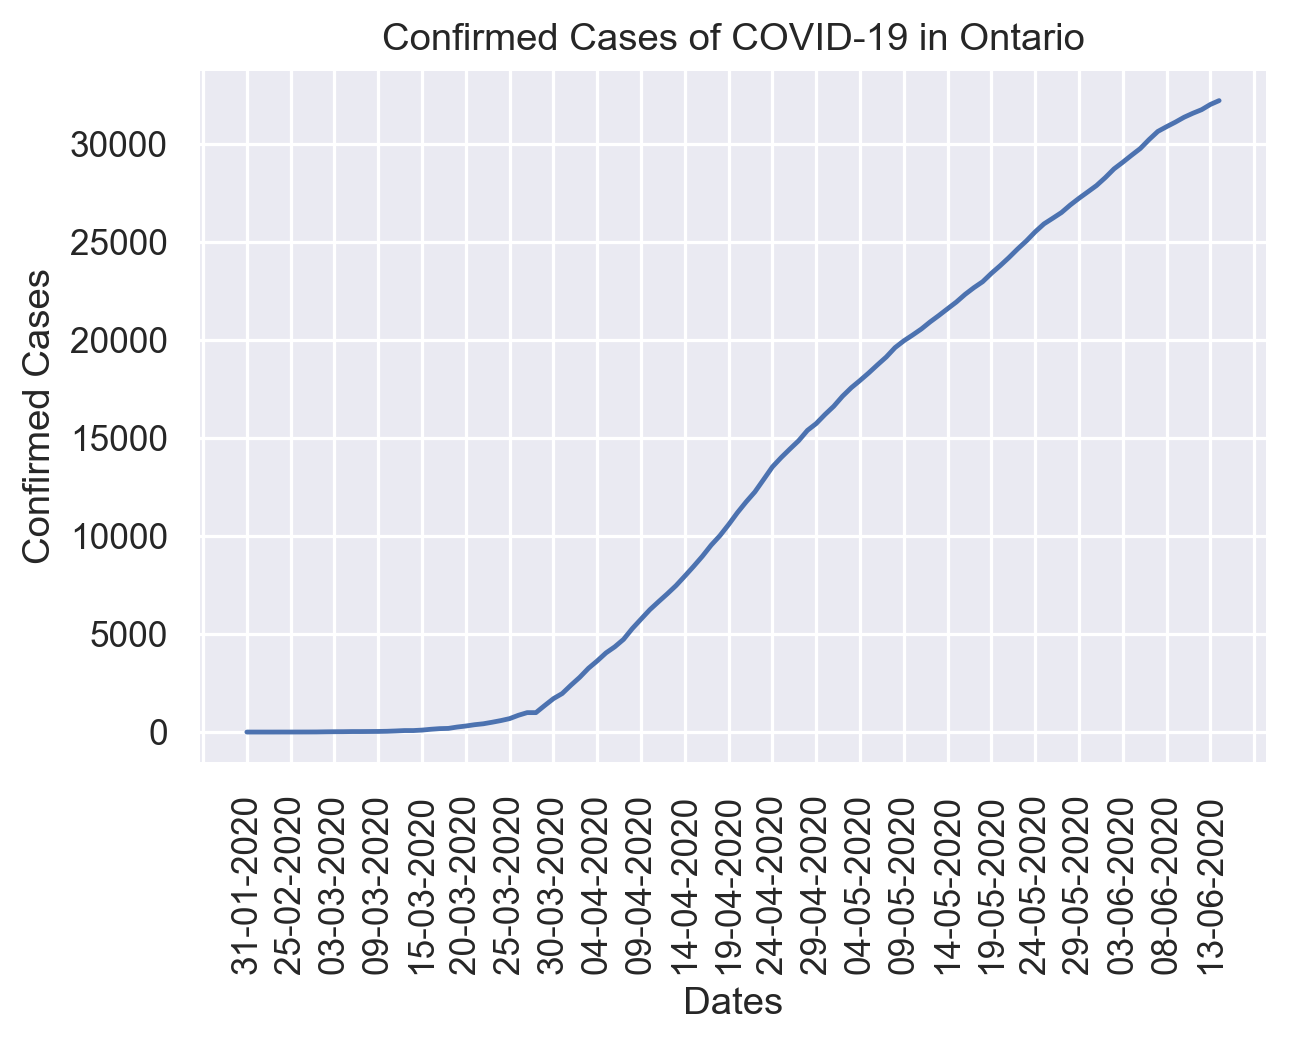

In [3]:
# plotting confirmed cases over time
sns.set()
fig, ax = plt.subplots(dpi=230)

ax.plot(dates.iloc[0:], ontario_confirmed_cases.iloc[0:])

ax.set_xlabel('Dates')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases of COVID-19 in Ontario')

# https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=90)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) 

plt.show()

In [4]:
# extracting number of hospitalized, ICU, ventilated
# data from: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
ontario_data = pd.read_csv('covidtesting.csv')
report_dates = ontario_data.transpose().iloc[0]

# getting rid of times in report dates
#report_dates_formatted = []

patients_hospitalized = ontario_data.transpose().iloc[11]
patients_icu = ontario_data.transpose().iloc[12]
patients_icu_vent = ontario_data.transpose().iloc[13]

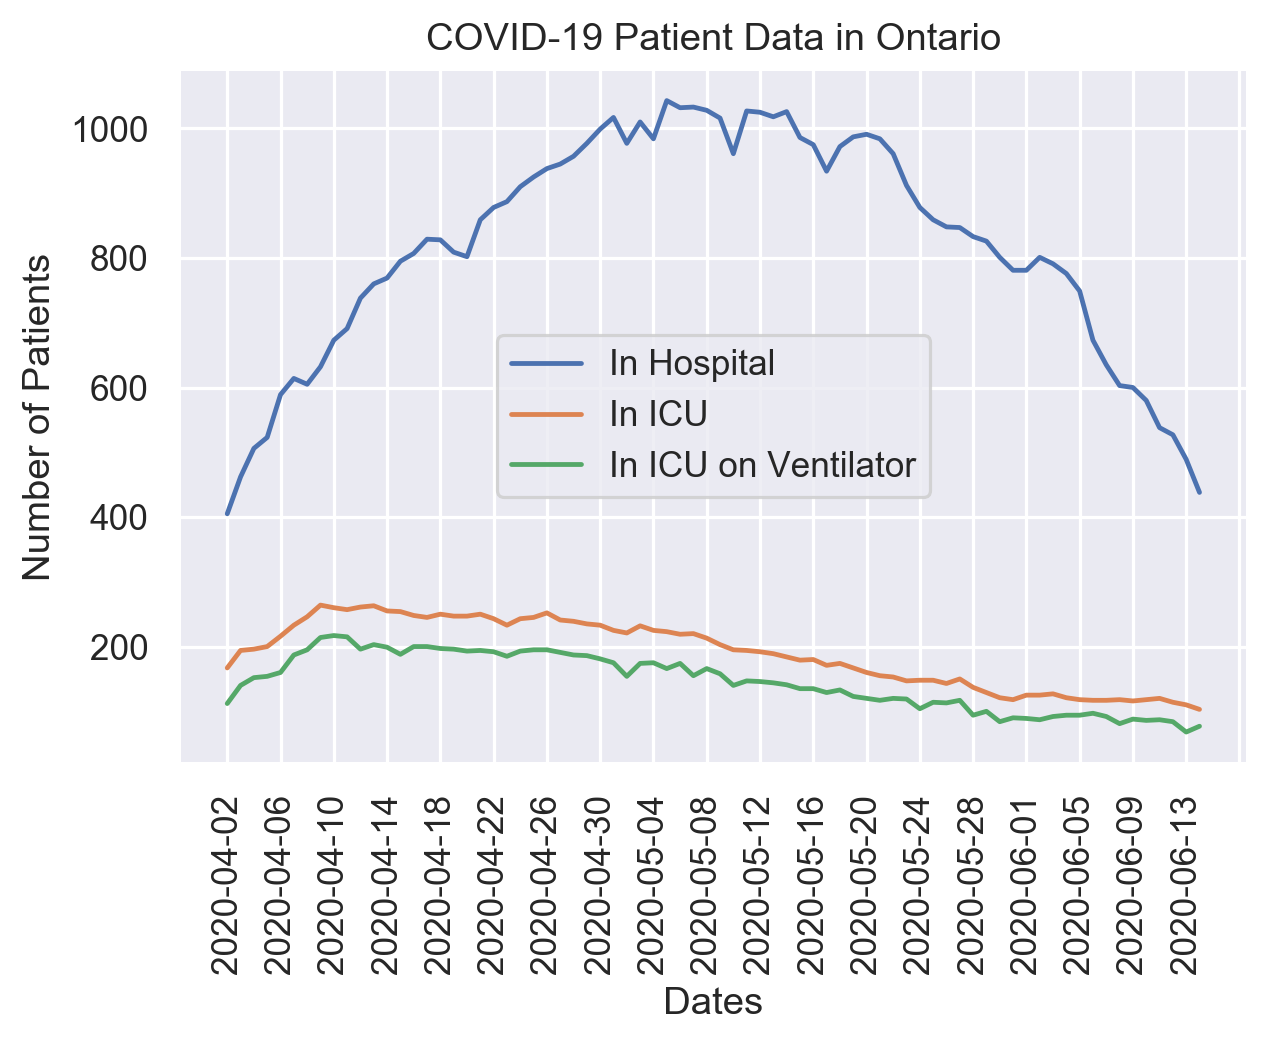

In [5]:
# plotting number of hospitalized, ICU, ventilated
sns.set()
fig, ax = plt.subplots(dpi=230)

ax.plot(report_dates.iloc[0:], patients_hospitalized.iloc[0:], label='In Hospital')
ax.plot(report_dates.iloc[0:], patients_icu.iloc[0:], label='In ICU')
ax.plot(report_dates.iloc[0:], patients_icu_vent.iloc[0:], label='In ICU on Ventilator')

ax.set_xlabel('Dates')
ax.set_ylabel('Number of Patients')
ax.set_title('COVID-19 Patient Data in Ontario')

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(4)) 

plt.legend()
plt.show()

In [6]:
# extracting confirmed cases in all of Canada
canada_data = total_data.loc[total_data['pruid'] == 1]

canada_confirmed_cases = canada_data.transpose().iloc[7]

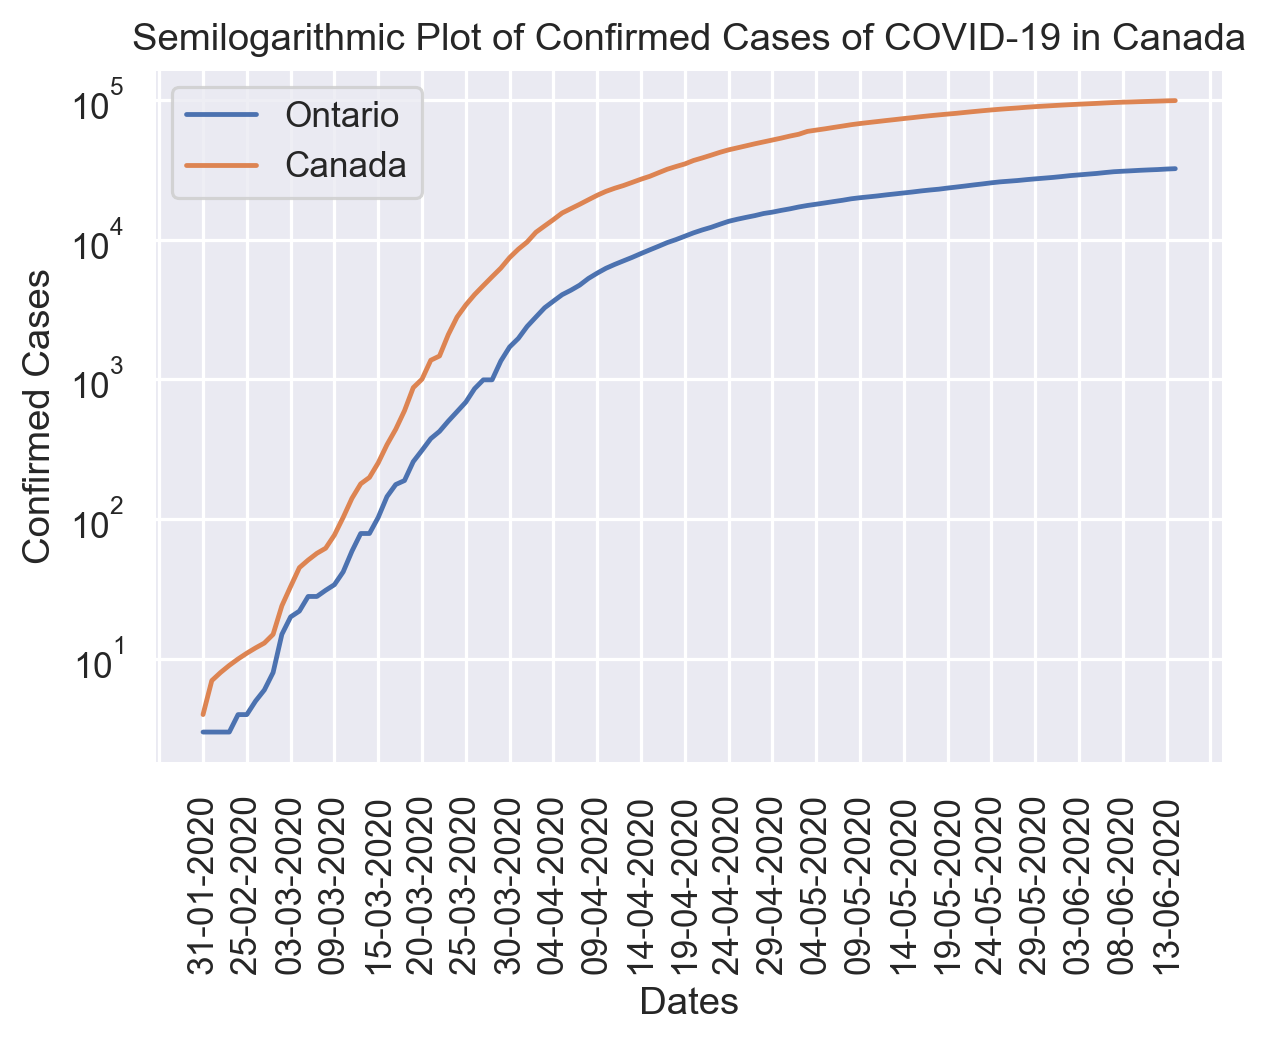

In [7]:
# semilog plot comparing cases in Ontario to Canda
sns.set()
fig, ax = plt.subplots(dpi=230)

ax.semilogy(dates.iloc[0:], ontario_confirmed_cases.iloc[0:], label='Ontario')
ax.semilogy(dates.iloc[0:], canada_confirmed_cases.iloc[0:], label='Canada')

ax.set_xlabel('Dates')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Semilogarithmic Plot of Confirmed Cases of COVID-19 in Canada')

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) 

plt.legend(loc=2)
plt.show()